# Modelo machine learning - Classificação de fake news


**Contexto**

Notícias falsas se tornaram um dos maiores problemas de nossa época. Isso tem um sério impacto em nosso discurso online e offline. Pode-se mesmo dizer que, até o momento, as notícias falsas representam um perigo claro e presente para a democracia ocidental e a estabilidade da sociedade.

**Contente**

O que está dentro é mais do que apenas linhas e colunas. Torne mais fácil para outras pessoas começarem descrevendo como você adquiriu os dados e também o período de tempo que eles representam.

**Reconhecimentos**

Não estaríamos aqui sem a ajuda de outras pessoas. Se você deve alguma atribuição ou agradecimento, inclua-os aqui junto com quaisquer citações de pesquisas anteriores.

**Inspiração**

Seus dados estarão em frente à maior comunidade de ciência de dados do mundo. Que perguntas você deseja ver respondidas?

**Base de dados original**
https://www.kaggle.com/hassanamin/textdb3

In [18]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\rafae\AppData\Local\Programs\Python\Python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\rafae\\AppData\\Local\\Temp\\pip-install-je5fhjgt\\wordcloud_a2723bab90064b59b4c15035aaa8e7fd\\setup.py'"'"'; __file__='"'"'C:\\Users\\rafae\\AppData\\Local\\Temp\\pip-install-je5fhjgt\\wordcloud_a2723bab90064b59b4c15035aaa8e7fd\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\rafae\AppData\Local\Temp\pip-wheel-j5m5g_qa'
       cwd: C:\Users\rafae\AppData\Local\Temp\pip-install-je5fhjgt\wordcloud_a2723bab90064b59b4c15035aaa8e7fd\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  cre

In [1]:
# Versão do python 
from platform import python_version

print("Versão python neste notebook:", python_version())

Versão python neste notebook: 3.9.8


In [2]:
# Bibliotecas do python

import pandas as pd # Biblioteca para carregar dataset
import numpy as np # Manipulação de alegbra linear

# Bibliotecas para visualização de dados
import seaborn 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Carregamento e visualização das bibliotecas e versões 

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

sys       : 3.9.8 (tags/v3.9.8:bb3fdcf, Nov  5 2021, 20:48:33) [MSC v.1929 64 bit (AMD64)]
numpy     : 1.19.5
seaborn   : 0.11.2
matplotlib: 3.4.3
pandas    : 1.3.4



In [4]:
# configuração dos gráficos e cores, fontes pelo seaborn

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)

color = sns.color_palette()

In [5]:
# Carregando base de dados
# Base de dados

data = pd.read_csv('base/fake_or_real_news.csv')
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
# Exibindo os 5 primeiras linhas com o comando head()
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
# Exibindo os 5 últimos linhas com o comando tail()
data.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [8]:
# Exibindo quantidades de linhas e colunas 
data.shape

(6335, 4)

In [9]:
# Exibindo os tipos de dados
data.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [10]:
# Exibindo a info dos dados verificar os tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [11]:
# Verificando dados duplicados
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6330    False
6331    False
6332    False
6333    False
6334    False
Length: 6335, dtype: bool

In [12]:
# Quantidade de fake e real

total = data.label
print(total.head())

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object


In [13]:
# Verificando na coluna target total de fake, real 
# Dados de nóticias fake e real

noticias = data.label.value_counts
print("Total de nóticias verdadeiros e falso", noticias)

Total de nóticias verdadeiros e falso <bound method IndexOpsMixin.value_counts of 0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object>


In [14]:
# Retorna a variação imparcial
data.var()

Unnamed: 0    9.232506e+06
dtype: float64

In [15]:
# Renomerando as colunas

data.columns = ["ID", "Texto", "Data", "Previsão"]
data.head()

,ID,Texto,Data,Previsão
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Análise de dados

Text(0, 0.5, 'Total')

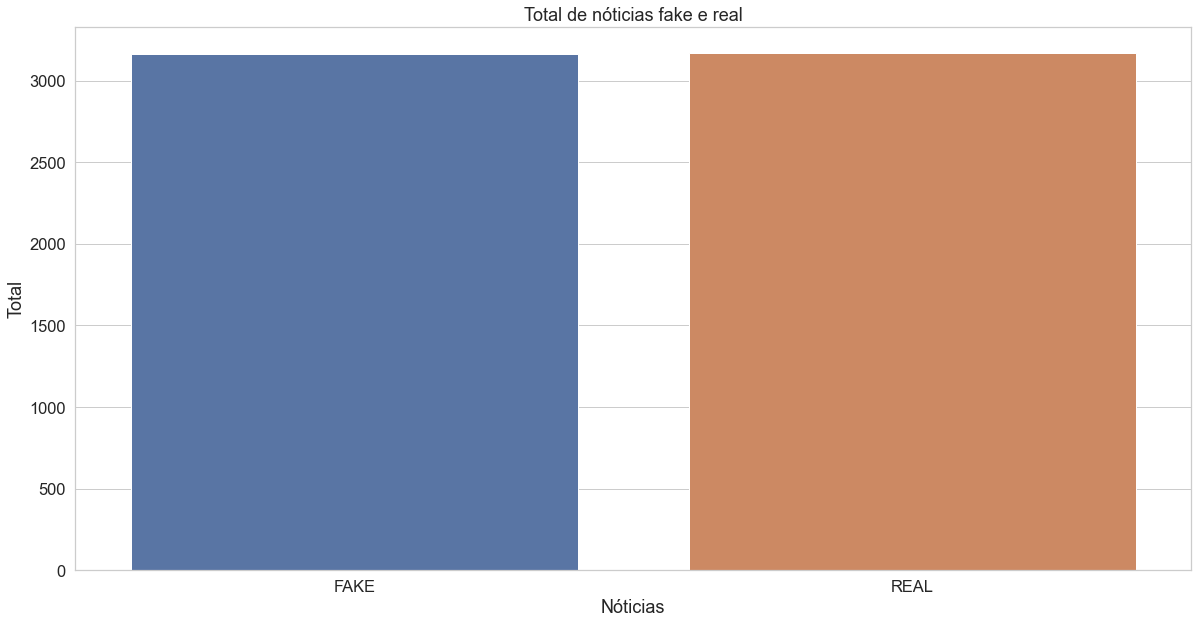

In [16]:
plt.figure(figsize=(20, 10))

plt.title("Total de nóticias fake e real")
ax = sns.countplot(data["Previsão"])
plt.xlabel("Nóticias")
plt.ylabel("Total")

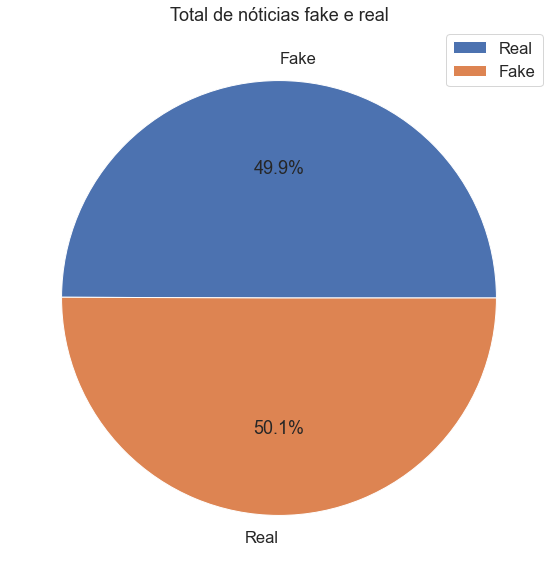

In [17]:
plt.figure(figsize=(20, 10))

plt.pie(data.groupby("Previsão")['Previsão'].count(), labels=["Fake", "Real"], autopct = "%1.1f%%");
plt.title("Total de nóticias fake e real")
plt.legend(["Real", "Fake"])

In [18]:
# Gráfico de nuvem com word cloud
from wordcloud import WordCloud

nuvem_palavras_df = ' '.join([texto for texto in data["Texto"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(nuvem_palavras_df)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

# Pré - processamento dos dados

In [19]:
# Defenindo base de treino e teste train e test

train = data["Texto"]
test = data["Previsão"]

In [20]:
# Visualizando linha e coluna da váriavel test
test.shape

(6335,)

In [21]:
# Visualizando a coluna texto sem limpeza dos textos
data.Texto

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: Texto, Length: 6335, dtype: object

In [22]:
import re
import nltk

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
word_lemmatizer = WordNetLemmatizer()

# Lemmatization dos dados
def Lemmatization(inst):
    pal = []
    for x in inst.split():
        pal.append(word_lemmatizer.lemmatize(x))
    return (" ".join(pal))

# Preprocessing base de dados
def Preprocessing(inst):
    inst = re.sub(r"http\S+", "", inst).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

# Negações dos textos
def neg(text):
    neg = ["não", "not"]
    neg_dect = False
    result = []
    pal = text.split()

    for x in pal:
        x = x.lower()
        if neg_dect == True:
            x = x + "_NEG"
        if x in neg:
            neg_dect = True
        result.append(x)
    return ("".join(result))

# stopwords dos textos seperando
def stopwords(inst):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

# stem - stemmer
def stem(inst):
    stem = nltk.stem.RSLPStemmer()
    pal = []
    for x in inst.split():
        pal.append(stemmer.stem(x))
    return (" ".join(pal))

# Limpeza dos dados recomendo instancia de http 
def dados_limp(inst):
    inst = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (inst)

In [24]:
# Dados limpados da coluna texto

train = [Preprocessing(i) for i in train]
train[:1000]

['smell hillary’s fear',
 'watch exact moment paul ryan committed political suicide trump rally (video',
 'kerry go paris gesture sympathy',
 "bernie supporters twitter erupt anger dnc 'we tried warn you!'",
 'battle new york primary matters',
 'tehran, usa',
 'girl horrified watches boyfriend left facetime',
 '‘britain’s schindler’ dies 106',
 "fact check trump clinton 'commanderinchief' forum",
 'iran reportedly makes new push uranium concessions nuclear talks',
 'three clintons iowa, glimpse fire eluded hillary clinton’s campaign',
 'donald trump’s shockingly weak delegate game somehow got even worse',
 'strong solar storm, tech risks today | s0 news oct262016 [video]',
 '10 ways america preparing world war 3',
 'trump takes cruz, lightly',
 'women lead differently',
 'shocking! michele obama & hillary caught glamorizing date rape promoters',
 'hillary clinton huge trouble america noticed sick thing hidden picture * liberty writers news',
 "what's iran bill obama like?",
 '1 chart e

In [25]:
# Utilizando One hot encoder

from sklearn.preprocessing import OneHotEncoder

HTE = ["Previsão"]

for x in HTE:
    hot = OneHotEncoder()
    data[x] = hot.fit_transform(data[x].values.reshape(-1,1)).toarray()

data.head()

,ID,Texto,Data,Previsão
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1.0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1.0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0.0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1.0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0.0


# Treino e teste do modelo

- Treino e teste do modelo machine learning
- 20 para dados de treino
- 80 para dados de teste


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 0)

In [27]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train

["homeland security deal boehner follow mcconnell's lead? (+video",
 'bill clinton makes powerful case hillary personal speech dnc',
 'dakota access pipeline protesters occupy hillary clinton campaign hq',
 'representative government thugocracy?',
 'trump concedes, calls clinton congratulate',
 'abortion gaffes show trump leftwing caricature conservative',
 'trump’s camp manager destroys hillary pointing 1 thing missed',
 'joint way forward deal lead peace progress afghans',
 'november 8 (finally abridged election day resource guide',
 'gop went south',
 'clinton’s cowardice trade',
 'hillary clinton bernie sanders = lecture vs rock concert',
 'donald trump hillary clinton stand economic issues',
 'egyptian planes pound isis libya revenge mass beheadings christians',
 'trump, clinton clash dueling dc speeches',
 'paul ryan 1, donald trump 0',
 'fighting ghost fascists aiding real ones',
 'fbi expands probe clinton emails, launches independent classification review',
 "trudeau elected c

In [28]:
# Total de linhas dos dados de treino y
y_train.shape

(4434,)

In [29]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(1901,)

# Sklearn Tfidf Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tf_train = tfidf_vectorizer.fit_transform(x_train)
tf_test = tfidf_vectorizer.transform(x_test)

In [31]:
# TfidfVectorizer de colunas e linhas de train

tf_train.shape

(4434, 8367)

In [32]:
# TfidfVectorizer de colunas e linhas de teste

tf_test.shape

(1901, 8367)

# Modelo machine learning

- Modelo 01 - Passive Aggressive Classifier

In [33]:
%%time
from sklearn.linear_model import PassiveAggressiveClassifier

# Nome do algoritmo M.L
model_passive_aggressive = PassiveAggressiveClassifier(max_iter=50)

# Treinamento do modelo
model_passive_aggressive_fit = model_passive_aggressive.fit(tf_train, y_train)

# Score do modelo
model_passive_aggressive_score = model_passive_aggressive.score(tf_train, y_train)

# Previsão do modelo
model_passive_aggressive_predict = model_passive_aggressive.predict(tf_test)

print("modelo passive aggressive: %.2f" % (model_passive_aggressive_score * 100))

modelo passive aggressive: 99.98
Wall time: 30.1 ms


In [34]:
# Accuracy do modelo - Passive aggressive classifier
from sklearn.metrics import accuracy_score

accuracy_passive_aggressive = accuracy_score(y_test, model_passive_aggressive_predict)
print("Accuracy - Passive aggressive classifier: %.2f" % (accuracy_passive_aggressive * 100))

Accuracy - Passive aggressive classifier: 78.59


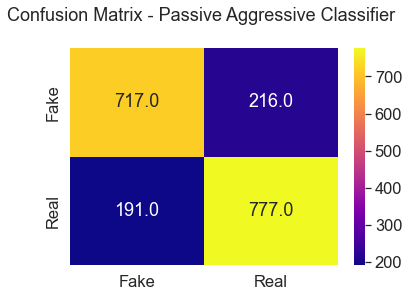

In [35]:
# confusion matrix do passive aggressive classifier
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, model_passive_aggressive_predict)

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Passive Aggressive Classifier \n'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", 'Real']);
print()

In [36]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, model_passive_aggressive_predict)
print("Modelo 01 - Passive Aggressive Classifier")
print()
print(classification)

Modelo 01 - Passive Aggressive Classifier

              precision    recall  f1-score   support

        FAKE       0.79      0.77      0.78       933
        REAL       0.78      0.80      0.79       968

    accuracy                           0.79      1901
   macro avg       0.79      0.79      0.79      1901
weighted avg       0.79      0.79      0.79      1901



**Modelo 02 - Regressão logistica**